In [2]:
import matplotlib.pyplot as plt
from numpngw import write_apng
from cartpole_env1 import *
import numpy as np
from IPython.display import Image

pybullet build time: Feb 13 2023 02:28:52


In [3]:
%load_ext autoreload
%autoreload 2

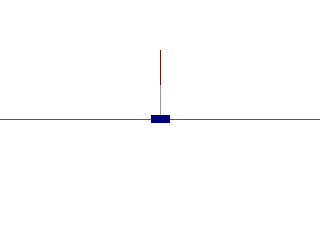

In [13]:
# set deterministic seed
np.random.seed(2)

# first let's generate a random control sequence
T = 100
control_sequence = np.random.randn(T, 1).astype(np.float32)
# control_sequence = np.ones((T, 1)).astype(np.float32)

#actual angle from vertical line
start_state = np.array([0, 0, 0, 0, 0, 0], dtype=np.float32)
env = MyCartpoleEnv()
env.reset(start_state)

# We use the simulator to simulate a trajectory
states_pybullet = np.zeros((T+1, 6))
states_pybullet[0] = start_state
frames = []
for t in range(T):
    states_pybullet[t+1] = env.step(control_sequence[t])
    img = env.render()
    frames.append(img)

# print('states_pybullet: ', states_pybullet.shape)

current_state = torch.from_numpy(start_state).reshape(1, 6)
current_control = torch.from_numpy(control_sequence[0]).reshape(1, 1) # add batch dimension to control
dynamics_analytic(current_state, current_control)
# print("good")

# Now we will use your analytic dynamics to simulate a trajectory
states_analytic = torch.zeros(T+1, 1, 6) # Need an extra 1 which is the batch dimension (T x B x 4)
states_analytic[0] = torch.from_numpy(start_state).reshape(1, 6)
for t in range(T):
    current_state = states_analytic[t]
    current_control = torch.from_numpy(control_sequence[t]).reshape(1, 1) # add batch dimension to control    
    states_analytic[t+1] = dynamics_analytic(current_state, current_control)
    
# convert back to numpy for plotting
states_analytic = states_analytic.reshape(T+1, 6).numpy()

# states_analytic = -states_analytic
# states_analytic = np.zeros_like(states_analytic)

write_apng("./fig/cartpole_example.gif", frames, delay=10)
Image(filename="./fig/cartpole_example.gif")

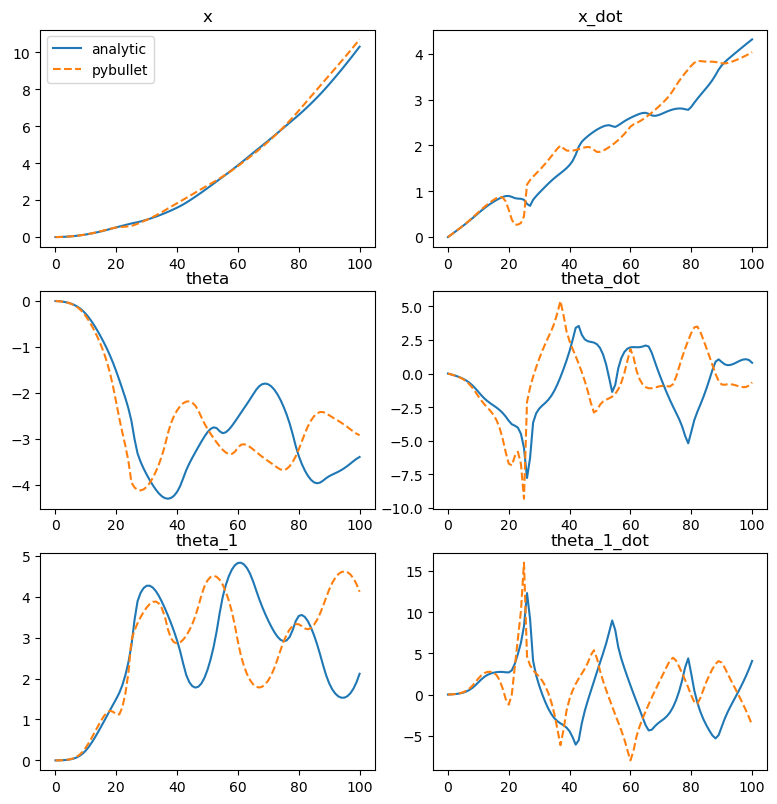

In [7]:
# Plot and compare - They should be indistinguishable 
fig, axes = plt.subplots(3, 2, figsize=(8, 8))
plt.tight_layout()
axes[0][0].plot(states_analytic[:, 0], label='analytic')
axes[0][0].plot(states_pybullet[:, 0], '--', label='pybullet')
axes[0][0].title.set_text('x')

axes[1][0].plot(states_analytic[:, 1])
axes[1][0].plot(states_pybullet[:, 1], '--')
axes[1][0].title.set_text('theta')

axes[2][0].plot(states_analytic[:, 2])
axes[2][0].plot(states_pybullet[:, 2], '--')
axes[2][0].title.set_text('theta_1')

axes[0][1].plot(states_analytic[:, 3])
axes[0][1].plot(states_pybullet[:, 3], '--')
axes[0][1].title.set_text('x_dot')

axes[1][1].plot(states_analytic[:, 4])
axes[1][1].plot(states_pybullet[:, 4], '--')
axes[1][1].title.set_text('theta_dot')

axes[2][1].plot(states_analytic[:, 5])
axes[2][1].plot(states_pybullet[:, 5], '--')
axes[2][1].title.set_text('theta_1_dot')

axes[0][0].legend()
plt.show()